# This is a Jupyter notebook for CE888 Assignment 1 - Imbalanced Datasets
In this notebook, we will load three balanced datasets, unbalance them by resampling the the classes and test a new approach to dealing with imbalanced datasets.

# Step 1: Load the necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
%matplotlib inline

# Step 2: Load the datasets

###df2: Brain Tumor

Downloaded from Kaggle

This is a brain tumor feature dataset including five first-order features and eight texture features with the target level (in the column Class).
Image column defines image name and Class column defines either the image has tumor or not (1 = Tumor, 0 = Non-Tumor)


In [3]:
df2 = pd.read_csv("https://raw.githubusercontent.com/superchromat/CE888/master/assignment1/Brain_Tumor.csv?raw=true")

df2

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


Look at the data types of the columns in the dataframes

In [4]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

No missing values in any of the datasets.

Now look at the count of the target class to make sure they are balanced.

In [5]:
print(df2['Class'].value_counts())

0    2079
1    1683
Name: Class, dtype: int64


Now let's do some checks of the numerical columns.

In [6]:
print(df2.describe())

             Class         Mean  ...  Correlation     Coarseness
count  3762.000000  3762.000000  ...  3762.000000   3.762000e+03
mean      0.447368     9.488890  ...     0.955767  7.458341e-155
std       0.497288     5.728022  ...     0.026157   0.000000e+00
min       0.000000     0.078659  ...     0.549426  7.458341e-155
25%       0.000000     4.982395  ...     0.947138  7.458341e-155
50%       0.000000     8.477531  ...     0.961610  7.458341e-155
75%       1.000000    13.212723  ...     0.971355  7.458341e-155
max       1.000000    33.239975  ...     0.989972  7.458341e-155

[8 rows x 14 columns]


Create a histogram of the numerical columns of the datasets

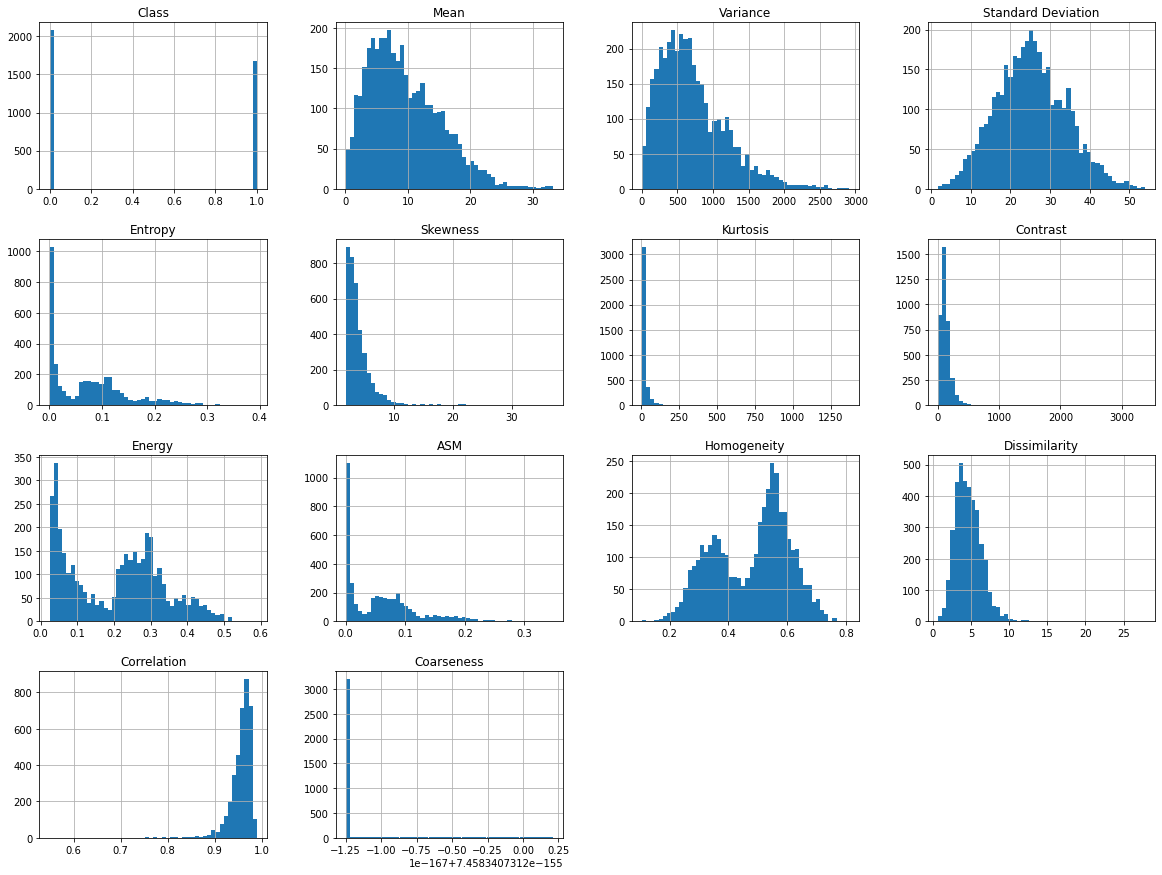

In [7]:
_ = df2.hist(bins=50, figsize=(20,15))
#plt.savefig(fname, dpi=1200, format=pdf)

# Step 3: Preprocessing & Creating Imbalance

We create versions/surrogates in addition to the original data by subsamspling one of the classes

The dataframe has a current imbalance of 55% with Class 0 having more values than Class 1. We can undersample Class 1 to create a 75% imbalance in the dataset.

In [8]:
df2['Class'].value_counts()

0    2079
1    1683
Name: Class, dtype: int64

In [9]:
# code below adapted from [https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets]
# class count
count_class_0, count_class_1 = df2.Class.value_counts()

# divide by class
df_class_0 = df2[df2['Class'] == 0]
df_class_1 = df2[df2['Class'] == 1]

df_class_1_under = df_class_1.sample(941)
df2_under = pd.concat([df_class_1_under, df_class_0], axis=0)

In [10]:
df2_under

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
3216,Image3217,1,9.262405,1294.247167,35.975647,0.001285,4.406134,20.476593,62.290299,0.029863,0.000892,0.317306,4.767413,0.977153,7.458341e-155
2413,Image2414,1,16.401260,1511.876542,38.882857,0.008454,2.976743,9.423693,128.372654,0.077659,0.006031,0.389963,5.156472,0.966971,7.458341e-155
652,Image653,1,6.950027,623.140229,24.962777,0.001285,4.362688,20.422258,174.502857,0.029865,0.000892,0.297662,6.963214,0.952735,7.458341e-155
1496,Image1497,1,5.197510,756.454791,27.503723,0.051385,5.629249,32.482118,371.233929,0.197243,0.038905,0.443133,6.566071,0.956623,7.458341e-155
2744,Image2745,1,7.339752,543.511249,23.313328,0.002057,3.888528,15.969424,97.599843,0.037800,0.001429,0.359346,5.263166,0.952909,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


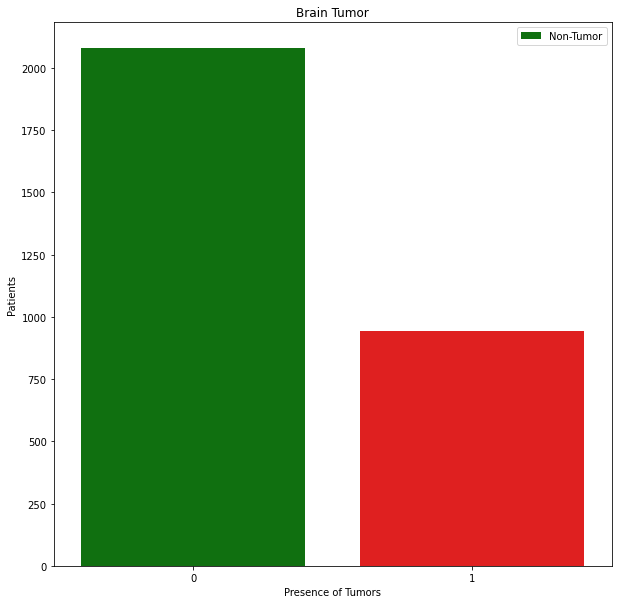

In [13]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(x = df2_under['Class'], palette=['Green','Red'])
plt.xlabel('Presence of Tumors')
plt.ylabel('Patients')
plt.legend(['Non-Tumor', 'Tumor'])
plt.title('Brain Tumor')
plt.show()